# KNN

In [177]:
from sklearn.metrics import accuracy_score , confusion_matrix , recall_score , precision_score , f1_score , classification_report , roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #LabelEncoder , StandardScaler, MinMaxScaler , RobustScaler
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [178]:
data = pd.read_csv('ML KNN Resource.txt')

In [179]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

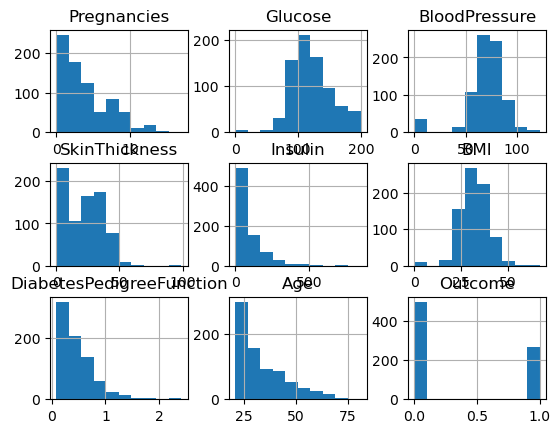

In [180]:
data.hist()

In [181]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [182]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

In [183]:
scalar = StandardScaler()

In [184]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [185]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [186]:
model = KNeighborsClassifier(5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [187]:
model.score(x_test,y_test)

0.7705627705627706

In [188]:
model.score(x_train,y_train)

0.7951582867783985

In [189]:
y_pred = model.predict(x_test)

In [190]:
F1Score = f1_score(y_test,y_pred)

In [191]:
F1Score

0.624113475177305

In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.66      0.59      0.62        74

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.77      0.77      0.77       231



# Elbow Method

In [193]:
testing_acc = []
training_acc = []
for i in range(1,31):
    model = KNeighborsClassifier(i)
    model.fit(x_train,y_train)
    training_acc.append(model.score(x_train,y_train))
    testing_acc.append(model.score(x_test,y_test))
    
print(training_acc)
print(testing_acc)

[1.0, 0.8286778398510242, 0.845437616387337, 0.8063314711359404, 0.7951582867783985, 0.7728119180633147, 0.7802607076350093, 0.7802607076350093, 0.7802607076350093, 0.7746741154562383, 0.7877094972067039, 0.7653631284916201, 0.7728119180633147, 0.7653631284916201, 0.7746741154562383, 0.7783985102420856, 0.776536312849162, 0.770949720670391, 0.7821229050279329, 0.7728119180633147, 0.7746741154562383, 0.770949720670391, 0.7635009310986964, 0.7579143389199255, 0.7616387337057728, 0.7635009310986964, 0.7690875232774674, 0.7579143389199255, 0.770949720670391, 0.7616387337057728]
[0.7142857142857143, 0.7186147186147186, 0.7272727272727273, 0.7619047619047619, 0.7705627705627706, 0.7575757575757576, 0.7445887445887446, 0.7662337662337663, 0.7705627705627706, 0.7575757575757576, 0.7662337662337663, 0.7532467532467533, 0.7792207792207793, 0.7619047619047619, 0.7748917748917749, 0.7662337662337663, 0.7575757575757576, 0.7662337662337663, 0.7619047619047619, 0.7489177489177489, 0.7575757575757576

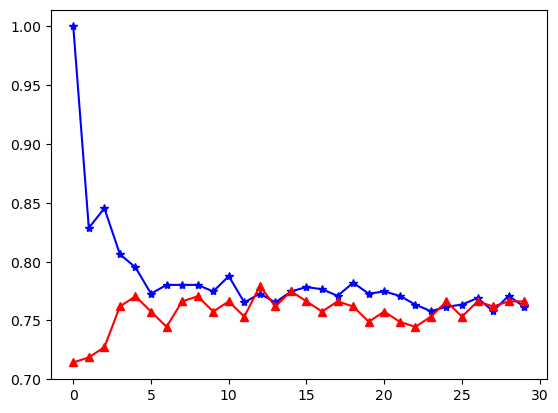

In [194]:
plt.plot(training_acc , color = "b" , marker= "*")
plt.plot(testing_acc, color = "r" , marker = "^")

In [234]:
final = KNeighborsClassifier(n_neighbors=9)

In [235]:
final.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [236]:
final.score(x_train,y_train)

0.7802607076350093

In [237]:
final.score(x_test,y_test)

0.7705627705627706

# Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
model1 = RandomForestClassifier(n_estimators=100, random_state=0)
model1.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [239]:
model1.score(x_train,y_train)

1.0

In [240]:
model1.score(x_test,y_test)

0.7792207792207793

In [241]:
accuracy_score(y_test,model1.predict(x_test))

0.7792207792207793

In [242]:
print(classification_report(y_test,model1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.70      0.54      0.61        74

    accuracy                           0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.78      0.77       231

